# Tugas Besar IF2220 Probabilitas dan Statistika 
## Penarikan Kesimpulan dan Pengujian Hipotesis 
<br>
Kelompok 18/K2 <br>
13522010&emsp;&emsp;&emsp; Maria Flora Renata S <br>
13522042&emsp;&emsp;&emsp; Amalia Putri <br>
<br><br>
Dataset: Weather

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

In [4]:
df = pd.read_csv("weather.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'weather.csv'

## 1. Descriptive Statistics

In [ ]:
def show_stats(df, kolom):
    print("Mean:",df[kolom].mean())
    print("Modus:", df[kolom].mode()[0])
    print("Standar deviasi:", df[kolom].std())
    print("Variansi:", df[kolom].var())
    print("Range:", np.ptp(df[kolom]))
    print("Nilai minimum:", df[kolom].min())
    print("25%:", df[kolom].quantile(.25))
    print("50% / median:", df[kolom].median())
    print("75%:", df[kolom].quantile(.75))
    print("Nilai maksimum:", df[kolom].max())
    print("IQR:", df[kolom].quantile(.75) - df[kolom].quantile(.25))
    print("Skewness:", df[kolom].skew())
    print("Kurtosis:", df[kolom].kurtosis())

Temperature

In [ ]:
show_stats(df, 'Temperature')

Mean: 24.94022514307522
Modus: 15.441316957465162
Standar deviasi: 3.0033062225223373
Variansi: 9.01984826624139
Range: 19.61874777765123
Nilai minimum: 15.441316957465162
25%: 22.919215986705414
50% / median: 24.93699999413365
75%: 26.98603499779567
Nilai maksimum: 35.06006473511639
IQR: 4.0668190110902565
Skewness: 0.029255857638227575
Kurtosis: -0.09530944979223399


Humidity

In [ ]:
show_stats(df, 'Humidity')

Mean: 70.11011336628557
Modus: 40.99139098229169
Standar deviasi: 9.807775427122317
Variansi: 96.19245882886436
Range: 63.681597699022944
Nilai minimum: 40.99139098229169
25%: 63.31363460909384
50% / median: 69.87179104955368
75%: 76.74430245426149
Nilai maksimum: 104.67298868131464
IQR: 13.430667845167648
Skewness: 0.0291354030224256
Kurtosis: -0.08927009589770307


Precipitation

In [ ]:
show_stats(df, 'Precipitation')

Mean: 9.922871970230524
Modus: -9.48083537806392
Standar deviasi: 5.031690926049643
Variansi: 25.31791357529032
Range: 36.332812691007746
Nilai minimum: -9.48083537806392
25%: 6.695717678859985
50% / median: 9.908851563144896
75%: 13.248398856865471
Nilai maksimum: 26.851977312943824
IQR: 6.552681178005486
Skewness: -0.013824850325701632
Kurtosis: 0.11903333480975897


Wind_Speed

In [ ]:
show_stats(df, 'Wind_Speed')

Mean: 14.929116676791585
Modus: -4.063693920506438
Standar deviasi: 4.9720982382184795
Variansi: 24.72176089049531
Range: 33.785533665522905
Nilai minimum: -4.063693920506438
25%: 11.499557450674146
50% / median: 14.89052283851765
75%: 18.24272621909406
Nilai maksimum: 29.721839745016467
IQR: 6.743168768419913
Skewness: 0.03555460027058753
Kurtosis: -0.09044900939024014


Cloud_Coverage

In [ ]:
show_stats(df, 'Cloud_Coverage')

Mean: 49.856025294062086
Modus: 13.241983190759465
Standar deviasi: 10.134825735738909
Variansi: 102.71469269379573
Range: 79.32809353671134
Nilai minimum: 13.241983190759465
25%: 43.12797340117523
50% / median: 49.99034721948384
75%: 56.20825403943335
Nilai maksimum: 92.5700767274708
IQR: 13.080280638258117
Skewness: 0.08562827238947684
Kurtosis: 0.31434868435021857


Weather_Type

In [ ]:
for i in df.Weather_Type.unique():
    print(i, (df.Weather_Type.value_counts()[i] / df.Weather_Type.count()))

Rainy 0.0965
Sunny 0.585
Cloudy 0.3175
Foggy 0.0005
Windy 0.0005


Wind_Direction

In [ ]:
for i in df.Wind_Direction.unique():
    print(i, (df.Wind_Direction.value_counts()[i] / df.Wind_Direction.count()))

West 0.248
East 0.242
South 0.251
North 0.259


Pressure

In [ ]:
show_stats(df, 'Pressure')

Mean: 1000.6913014450759
Modus: 800.0
Standar deviasi: 57.329859529105846
Variansi: 3286.7127936270085
Range: 400.0
Nilai minimum: 800.0
25%: 952.1313295259502
50% / median: 1000.9984394016672
75%: 1050.7022799320548
Nilai maksimum: 1200.0
IQR: 98.57095040610466
Skewness: -0.02559416779234322
Kurtosis: -1.063601546919682


UV_Index

In [ ]:
show_stats(df, 'UV_Index')

Mean: 5.464730285222571
Modus: 1.002470160945261
Standar deviasi: 2.5883637622890654
Variansi: 6.699626965931205
Range: 8.996459554919689
Nilai minimum: 1.002470160945261
25%: 3.3169497810683226
50% / median: 5.3262243691646365
75%: 7.677454864891333
Nilai maksimum: 9.99892971586495
IQR: 4.360505083823011
Skewness: 0.05917991994389661
Kurtosis: -1.1782609951055323


Air_Quality

In [ ]:
show_stats(df, 'Air_Quality')

Mean: 65.75788621804324
Modus: 35.82976896921295
Standar deviasi: 8.365776657358987
Variansi: 69.9862190808125
Range: 59.22766262857823
Nilai minimum: 35.82976896921295
25%: 60.24221969772731
50% / median: 65.73160012549741
75%: 71.07436117334521
Nilai maksimum: 95.05743159779118
IQR: 10.832141475617902
Skewness: 0.049396636350649586
Kurtosis: 0.0958626462660992


Visibility

In [ ]:
show_stats(df, 'Visibility')

Mean: 15.091751708368733
Modus: -2.1900088232331463
Standar deviasi: 4.98509631912466
Variansi: 24.851185310950232
Range: 37.19000882323314
Nilai minimum: -2.1900088232331463
25%: 11.773017475852342
50% / median: 15.20404460318385
75%: 18.428236827432205
Nilai maksimum: 35.0
IQR: 6.655219351579863
Skewness: -0.05618499789976462
Kurtosis: 0.23844681363832132


## 2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

Outlier pada data dapat dilihat dari box plot per kolom. Data-data yang terletak di luar range plot tersebut adalah outlier. Dari hasil box plot semua kolom data, terdapat outlier pada setiap kolom selain UV_Index.

Ada beberapa cara untuk menangani outlier, yaitu:
- Memfilter dataset dari awal / saat memasukkan data
- Menghapus data outlier dari dataset
- Mengurangi/menambah nilai dari outlier supaya lebih dekat dengan data-data lain

Untuk dataset ini, kita dapat menghapus saja data outliernya. Penghapusan data dapat dilakukan dengan kode berikut:

In [ ]:
def hapus_outlier(df, kolom, batasBawah, batasAtas): # menghapus semua
    sns.boxplot(df[kolom]).set(title=f'Box plot awal {kolom}')
    plt.show()

    dihapus = df[df[kolom].between(batasBawah, batasAtas)]
    return dihapus
# Kode hanya menunjukkan box plot awal karena box plot setelah penghapusan akan ditunjukkan pada nomor 3

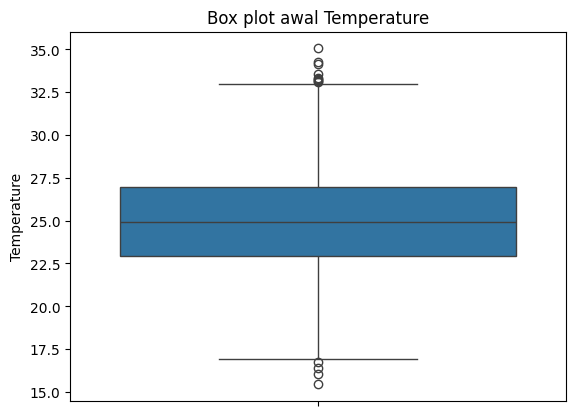

In [ ]:
df = hapus_outlier(df, 'Temperature', 18, 33)

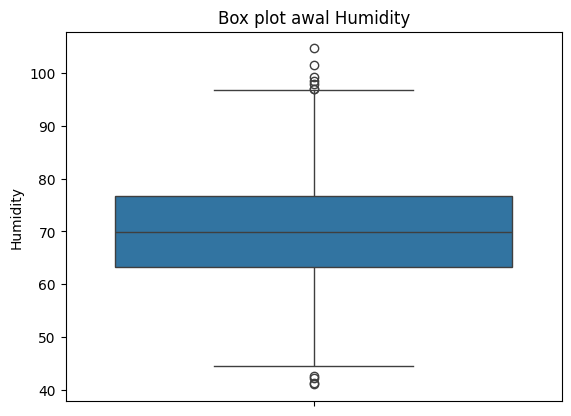

In [ ]:
df = hapus_outlier(df, 'Humidity', 45, 95)

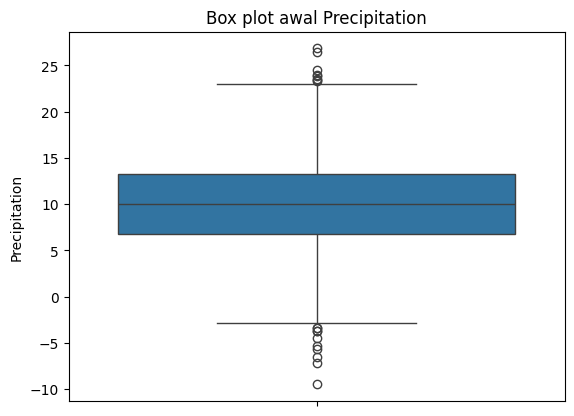

In [ ]:
df = hapus_outlier(df, 'Precipitation', -2, 21)

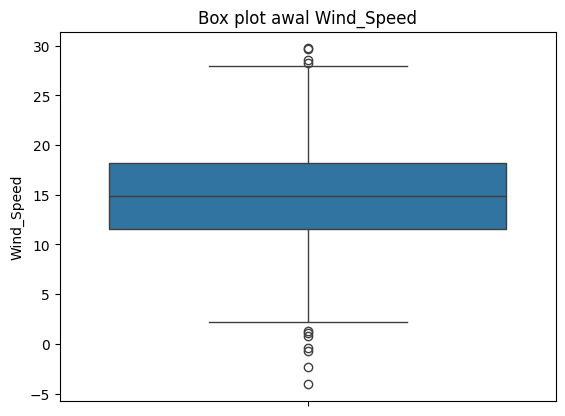

In [ ]:
df = hapus_outlier(df, 'Wind_Speed', 3, 27)

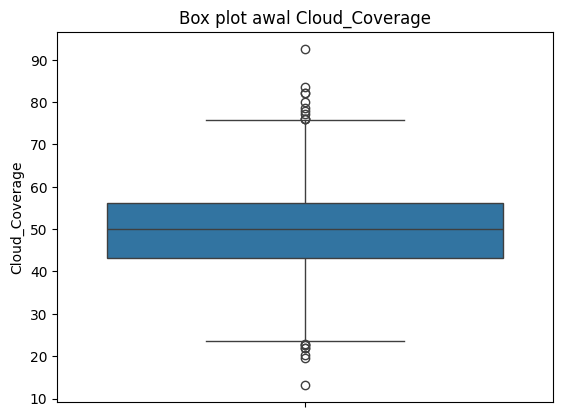

In [ ]:
df = hapus_outlier(df, 'Cloud_Coverage', 24, 75)

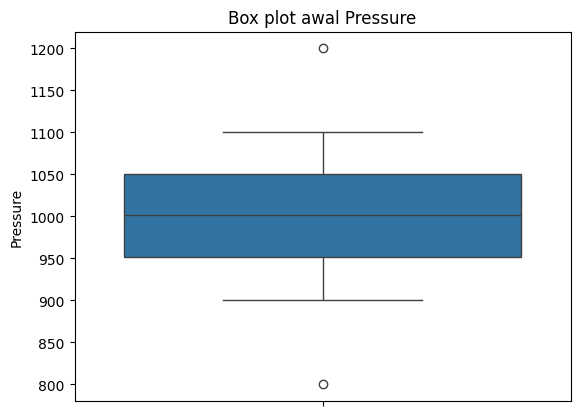

In [ ]:
df = hapus_outlier(df, 'Pressure', 900, 1100)

<Axes: ylabel='UV_Index'>

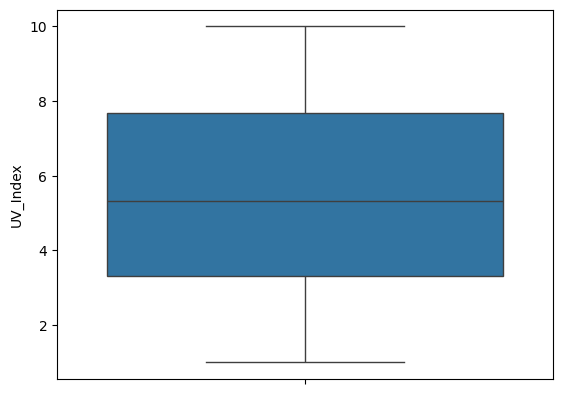

In [ ]:
sns.boxplot(df.UV_Index) # UV_Index tidak memiliki outlier, sehingga tidak perlu dihapus

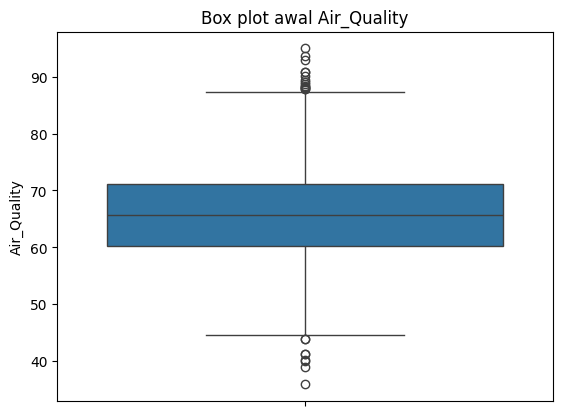

In [ ]:
df = hapus_outlier(df, 'Air_Quality', 45, 85)

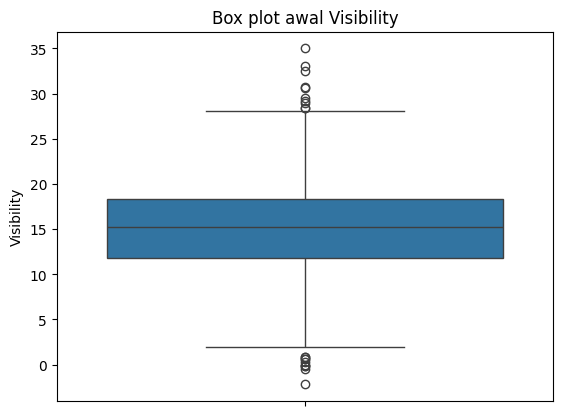

In [ ]:
df = hapus_outlier(df, 'Visibility', 3, 27)

## 3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

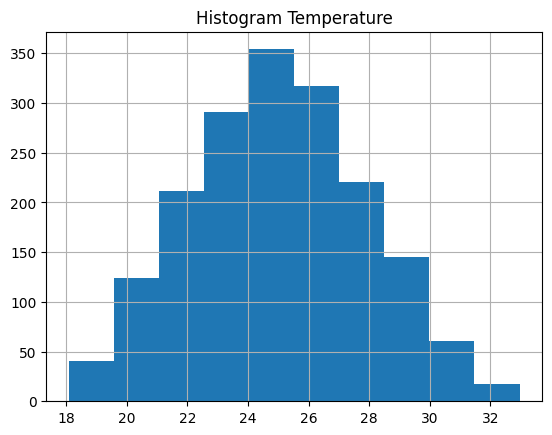

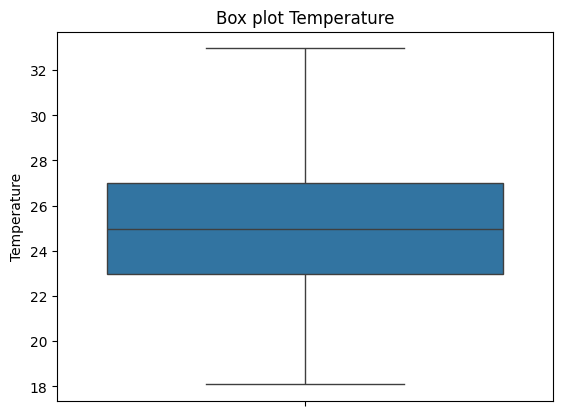

In [ ]:
df.Temperature.hist()
plt.title('Histogram Temperature')
plt.show()
sns.boxplot(df.Temperature).set(title=f'Box plot Temperature')
plt.show()

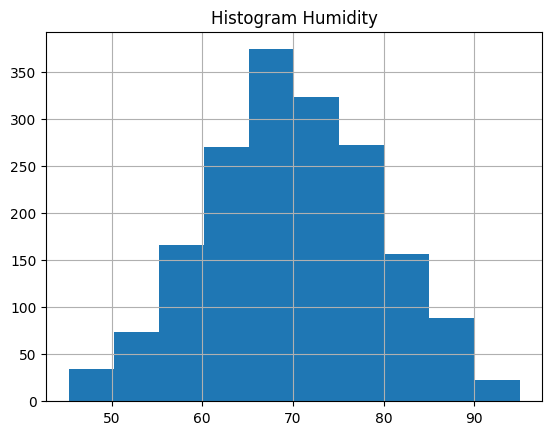

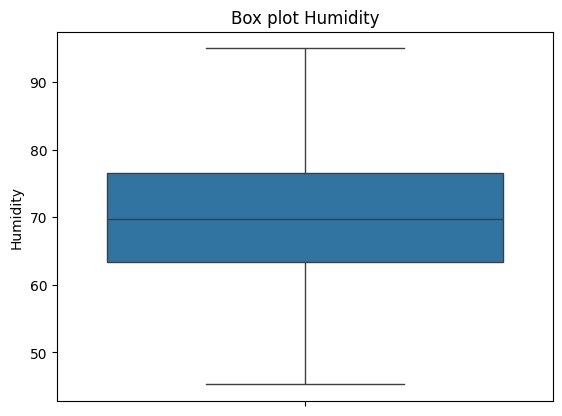

In [ ]:
df.Humidity.hist()
plt.title('Histogram Humidity')
plt.show()
sns.boxplot(df.Humidity).set(title=f'Box plot Humidity')
plt.show()

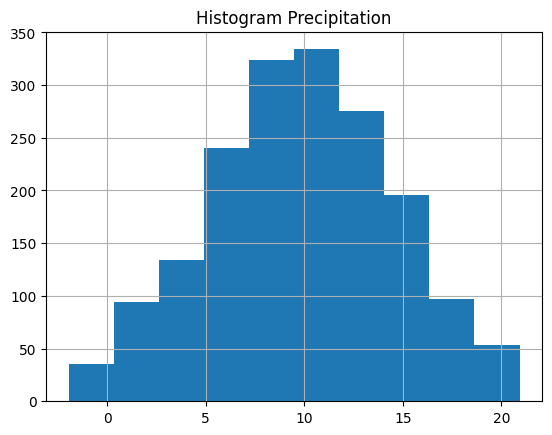

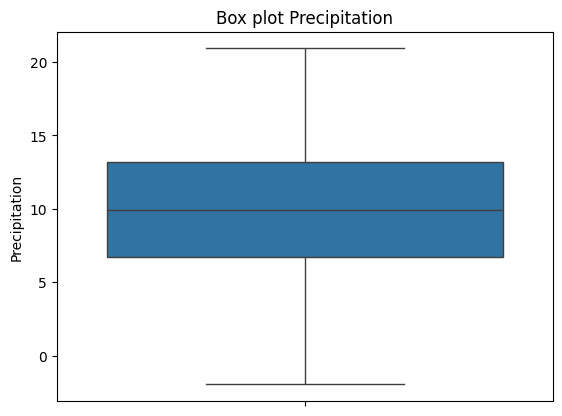

In [ ]:
df.Precipitation.hist()
plt.title('Histogram Precipitation')
plt.show()
sns.boxplot(df.Precipitation).set(title=f'Box plot Precipitation')
plt.show()

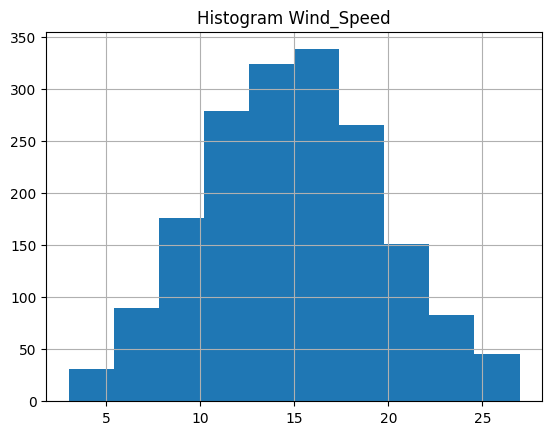

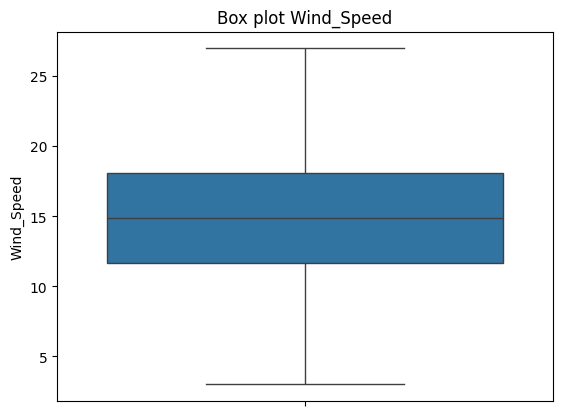

In [ ]:
df.Wind_Speed.hist()
plt.title('Histogram Wind_Speed')
plt.show()
sns.boxplot(df.Wind_Speed).set(title=f'Box plot Wind_Speed')
plt.show()

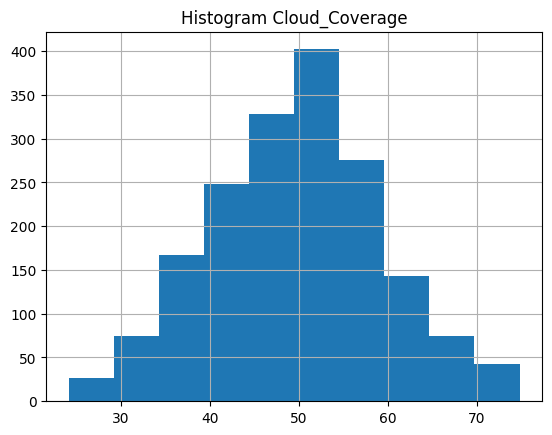

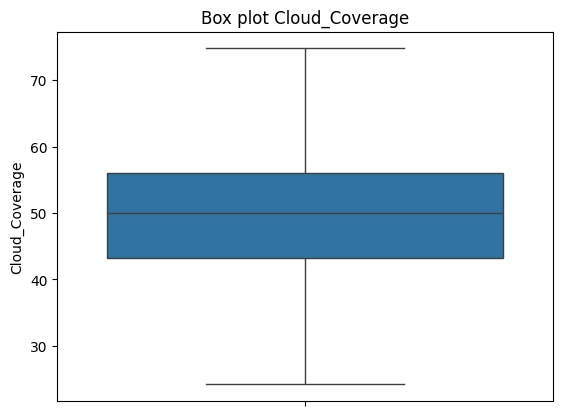

In [ ]:
df.Cloud_Coverage.hist()
plt.title('Histogram Cloud_Coverage')
plt.show()
sns.boxplot(df.Cloud_Coverage).set(title=f'Box plot Cloud_Coverage')
plt.show()

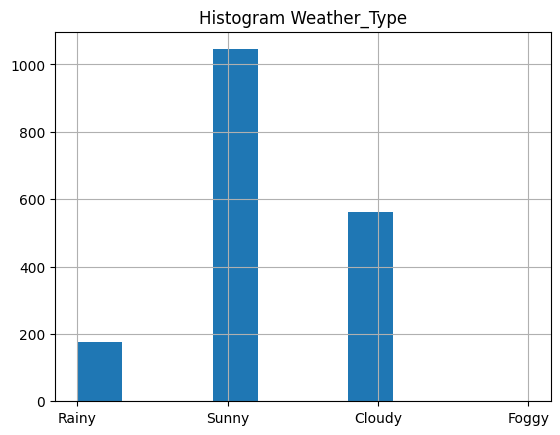

In [ ]:
df.Weather_Type.hist()
plt.title('Histogram Weather_Type')
plt.show()

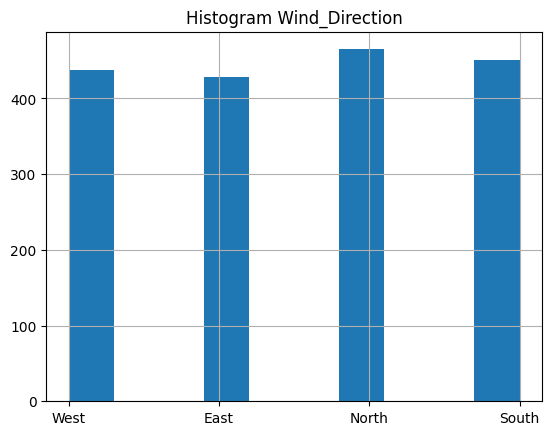

In [ ]:
df.Wind_Direction.hist()
plt.title('Histogram Wind_Direction')
plt.show()

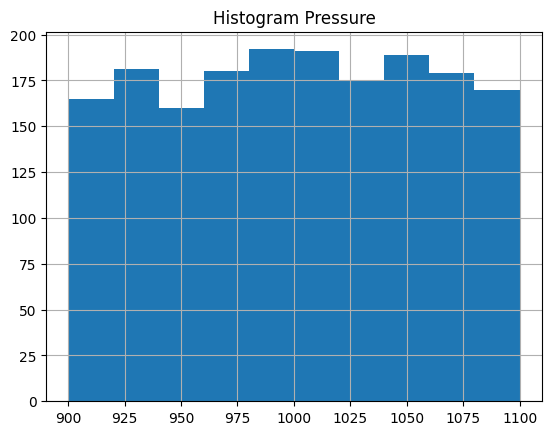

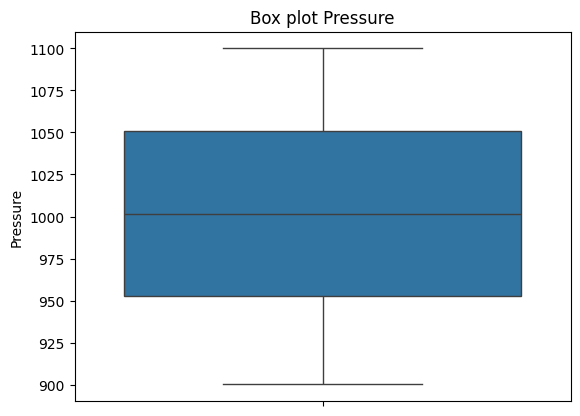

In [ ]:
df.Pressure.hist()
plt.title('Histogram Pressure')
plt.show()
sns.boxplot(df.Pressure).set(title=f'Box plot Pressure')
plt.show()

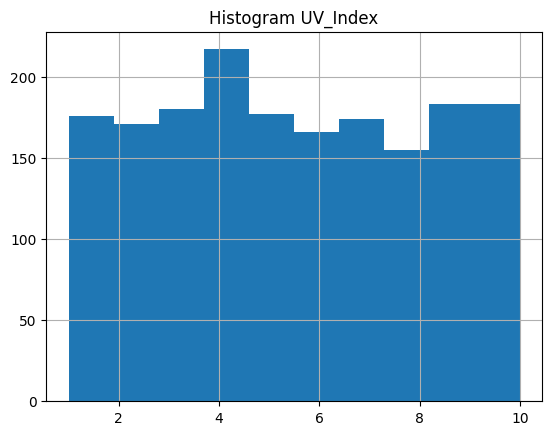

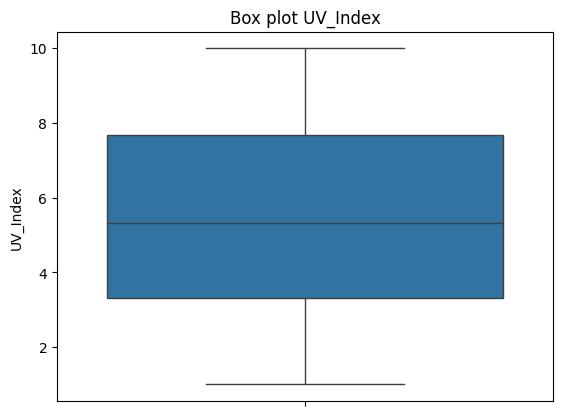

In [ ]:
df.UV_Index.hist()
plt.title('Histogram UV_Index')
plt.show()
sns.boxplot(df.UV_Index).set(title=f'Box plot UV_Index')
plt.show()

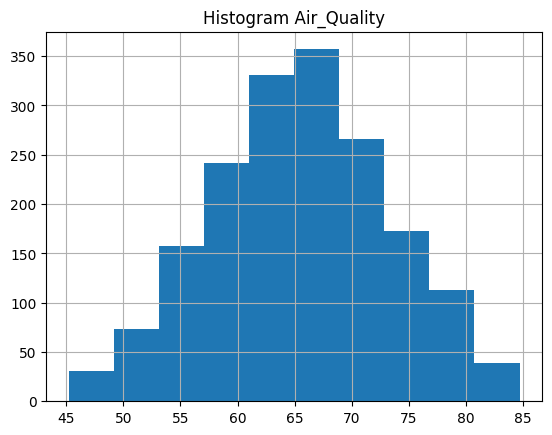

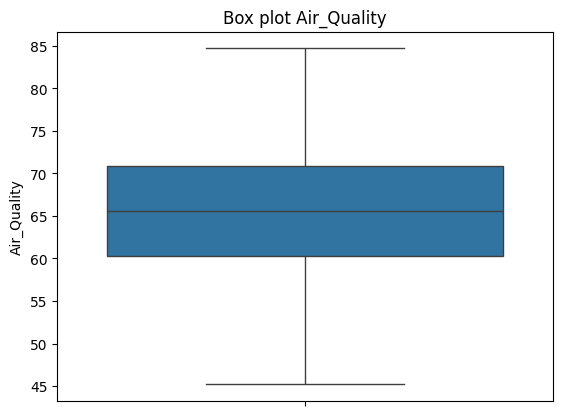

In [ ]:
df.Air_Quality.hist()
plt.title('Histogram Air_Quality')
plt.show()
sns.boxplot(df.Air_Quality).set(title=f'Box plot Air_Quality')
plt.show()

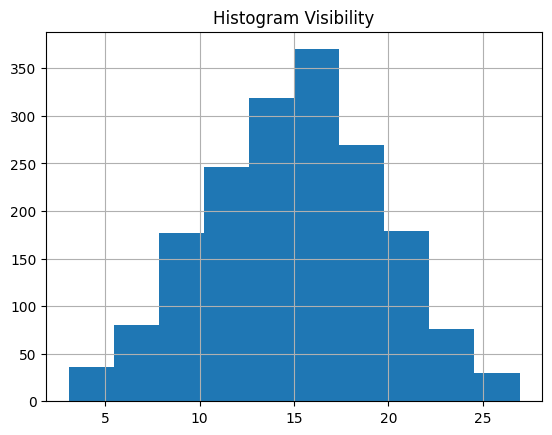

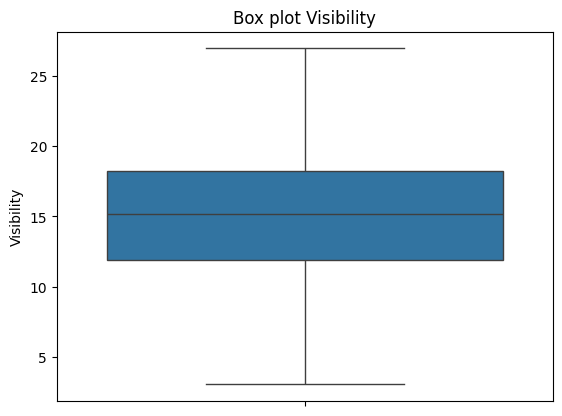

In [ ]:
df.Visibility.hist()
plt.title('Histogram Visibility')
plt.show()
sns.boxplot(df.Visibility).set(title=f'Box plot Visibility')
plt.show()

## 4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

Kumpulan data yang berdistribusi normal akan memiliki histogram yang berbentuk _bell curve_ atau seperti sebuah lonceng. Dari visualisasi histogram di nomor 3, kita dapat menyimpulkan bahwa:

1. Temperature: Berdistribusi normal
2. Humidity: Berdistribusi normal
3. Precipitation: Berdistribusi normal
4. Wind_Speed: Berdistribusi normal
5. Cloud_Coverage: Berdistribusi normal
6. Pressure: Berdistribusi uniform, karena bentuknya hampir menyerupai sebuah kotak
7. UV_Index: Berdistribusi uniform, karena bentuknya hampir menyerupai sebuah kotak
8. Air_Quality: Berdistribusi normal
9. Visibility: Berdistribusi normal


## Pengujian hipotesis 1 sampel

In [ ]:
def critical_region(a, h1): #h1 bernilai 0 untuk !=, 1 untuk >, dan -1 untuk <
    crit_low = -100
    crit_high = 100
    if (h1 == 0):
        crit_low = -1*scp.stats.norm.ppf(1-(a/2))
        crit_high = scp.stats.norm.ppf(1-(a/2))
    elif (h1 < 0):
        crit_low = -1*scp.stats.norm.ppf(1-a)
    else:
        crit_high = scp.stats.norm.ppf(1-a)
    return crit_low, crit_high 

### 5.a. Perusahaan menerima beberapa keluhan bahwa prediksi terkait nilai humidity di suatu daerah seringkali tidak tepat. Hal tersebut berakibat pada kurangnya persiapan masyarakat dalam melakukan penyesuaian kondisi termal tertentu. Dapatkah Anda mengecek apakah rata-rata nilai Humidity lebih dari 75?

i. Menentukan hipotesis nol<br>
&emsp;&emsp;H<sub>0</sub>:  μ = 75<br>
ii. Menentukan hipotesis alternatif<br>
&emsp;&emsp;H<sub>1</sub>:  μ > 75<br>
iii. Tentukan tingkat signifikan α<br>
&emsp;&emsp;α = 0.05

In [ ]:
# iv. Menentukan uji statistik dan daerah kritis
low, high = critical_region(0.05, 1) # critical region rendah dan tinggi
print("Daerah kritis adalah z >", high)
# Karena h1 adalah μ > 75, kita hanya akan menggunakan critical region high, 
# sedangkan variabel low diisi dengan nilai -1 karena hasil uji tidak akan lebih rendah dari nilai tersebut

# v. Menghitung nilai uji dan p-value
z = (df.Humidity.mean() - 75) / (df.Humidity.std()/pow(len(df.axes[0]), 0.5)) # menghitung nilai uji
val = scp.stats.norm.cdf(z) 
print("Nilai uji:",  z)
print("P-value:",  1-val)

Daerah kritis adalah z > 1.6448536269514722
Nilai uji: -22.393992300534237
P-value: 1.0


In [ ]:
# v.v. tes yang sama menggunakan library untuk pengecekan kebenaran
uji1, p_value = ztest(df.Humidity, value=75, alternative='larger')

print(f"Nilai z: {uji1}")
print(f"P-value: {p_value}")

Nilai z: -22.39399230053424
P-value: 1.0


vi. Keputusan <br>
Karena nilai uji tidak masuk ke dalam daerah kritis dan p-value > α, rata-rata humidity _tidak lebih besar_ dari 75

### 5.b. Perusahaan mengeluarkan nilai rata-rata UV_index sebesar 3. Akan tetapi, mayoritas pelanggan mengeluhkan kulitnya terasa terbakar. Sebagai karyawan yang baik, periksalah apakah rata-rata UV_Index yang diamati memang tidak sama dengan 3 (sesuai laporan pelanggan)? <br>

i. Menentukan hipotesis nol<br>
&emsp;&emsp;H<sub>0</sub>:  μ = 3<br>
ii. Menentukan hipotesis alternatif<br>
&emsp;&emsp;H<sub>1</sub>:  μ > 3, karena pelanggan merasa bahwa kulitnya terbakar (yang berarti UV_Index semestinya lebih besar dari yang dilaporkan)<br>
iii. Tentukan tingkat signifikan α<br>
&emsp;&emsp;α = 0.05

In [ ]:
# iv. Menentukan uji statistik dan daerah kritis
low, high = critical_region(0.05, 1) # critical region rendah dan tinggi
print("Daerah kritis adalah z >", high)
# Karena h1 adalah μ > 3, kita menggunakan critical region yang tingi saja

# v. Menghitung nilai uji dan p-value
z = (df.UV_Index.mean() - 3) / (df.UV_Index.std()/pow(len(df.axes[0]), 0.5)) # menghitung nilai uji
val = scp.stats.norm.cdf(z)
print("Nilai uji:",  z)
print("P-value:",  1-val)

Daerah kritis adalah z > 1.6448536269514722
Nilai uji: 40.089626773625
P-value: 0.0


In [ ]:
# v.v. tes yang sama menggunakan library untuk pengecekan kebenaran
uji1, p_value = ztest(df.UV_Index, value=3, alternative='larger')

print(f"Nilai uji: {uji1}")
print(f"P-value: {p_value}")

Nilai uji: 40.08962677362499
P-value: 0.0


vi. keputusan <br>
Karena nilai uji masuk ke dalam daerah kritis dan p-value < α, rata-rata UV_Index _lebih besar dari_ 3

### 5.c. Pemerintah setempat menyarankan agar penduduk menghindari aktivitas di luar ruangan di 5 hari terakhir (asumsi: data terbaru berada pada urutan paling awal) karena nilai rata-rata pressure diprediksi berada di angka 950. Periksa apakah nilai rata-rata pressure? <br>

i. Menentukan hipotesis nol<br>
&emsp;&emsp;H<sub>0</sub>:  μ = 950<br>
ii. Menentukan hipotesis alternatif<br>
&emsp;&emsp;H<sub>1</sub>:  μ <> 950<br>
iii. Tentukan tingkat signifikan α<br>
&emsp;&emsp;α = 0.05

In [ ]:
# iv. Menentukan uji statistik dan daerah kritis
low, high = critical_region(0.05, 0) # critical region rendah dan tinggi
print("Daerah kritis adalah z >", high, "dan z <", low)
# Karena h1 adalah μ != 950, kita menggunakan critical region yang tingi dan rendah

# v. Menghitung nilai uji dan p-value
z = (df.Pressure.iloc[:5].mean() - 950) / (df.Pressure.iloc[:5].std()/pow(5, 0.5)) # menghitung nilai uji
val = scp.stats.norm.cdf(z)
print("Nilai uji:",  z)
print("P-value:",  2*(1-val))

Daerah kritis adalah z > 1.959963984540054 dan z < -1.959963984540054
Nilai uji: 1.5262304133436893
P-value: 0.12695249173175638


In [ ]:
# v.v. tes yang sama menggunakan library untuk pengecekan kebenaran
uji1, p_value = ztest(x1 = df.Pressure.iloc[:5], x2 = None, value=950)

print(f"Nilai uji: {uji1}")
print(f"P-value: {p_value}")

Nilai uji: 1.5262304133436893
P-value: 0.12695249173175635


Karena nilai uji berada di luar daerah kritis dan nilai p-value > α, H0 tidak dapat ditolak dan rata-rata Pressure selama 5 hari terakhir dianggap _sama dengan_ 950. 

### 5.d. Apakah proporsi nilai Cloud_Coverage yang kurang dari 60 tidak sama dengan 35% dari total dataset, sesuai dengan himbauan yang diberikan oleh pemerintah setempat? <br>

i. Menentukan hipotesis nol<br>
&emsp;&emsp;H<sub>0</sub>:  p<sub>60</sub> = p<sub>35%</sub><br>
ii. Menentukan hipotesis alternatif<br>
&emsp;&emsp;H<sub>1</sub>:  p<sub>60</sub> <> p<sub>35%</sub><br>
iii. Tentukan tingkat signifikan α<br>
&emsp;&emsp;α = 0.05



In [ ]:
# iv. Menentukan uji statistik dan daerah kritis
low, high = critical_region(0.05, 0) # critical region rendah dan tinggi
print("Daerah kritis adalah z >", high, "dan z <", low)
# Karena h1 adalah p60 != p35%, kita menggunakan critical region yang tingi dan rendah

# v. Menghitung nilai uji dan p-value
x = df[df.Cloud_Coverage < 60].Cloud_Coverage.count()
n = df.Cloud_Coverage.count()
p60 = x / n
z = (p60 - 0.35) / pow(0.35*(1-0.35)/n,0.5) # menghitung nilai uji
val = scp.stats.norm.cdf(z)
print("Nilai uji:",  z)
print("P-value:",  2*(1-val))

Daerah kritis adalah z > 1.959963984540054 dan z < -1.959963984540054
Nilai uji: 45.30990217366657
P-value: 0.0


In [ ]:
# v.v. tes yang sama menggunakan library untuk pengecekan kebenaran
uji1, p_value = proportions_ztest(count=x, nobs = n, value=0.35)

print(f"Nilai uji: {uji1}")
print(f"P-value: {p_value}")

Nilai uji: 62.6510513512983
P-value: 0.0


Karena nilai uji masuk ke dalam daerah kritis dan nilai p-value < α, rata-rata proporsi Cloud_Coverage yang kurang dari 60 _tidak sama dengan_ 35% dari total dataset

## Pengujian hipotesis 2 sampel

Dataset akan dibagi menjadi 2 bagian, satu untuk daerah A dan satu untuk daerah B. Pembagian dataset akan dilakukan dengan membaginya di tengah, sehingga data ke 1 - n/2 akan menjadi bagian dari daerah A dan sisanya akan menjadi daerah B.

In [ ]:
SampleA = df.iloc[:int(len(df.axes[0])/2)]
SampleB = df.iloc[int(len(df.axes[0])/2):]

In [ ]:
def two_sample_mean(df1, df2, col, d0):
    return (((df1[col].mean() - df2[col].mean()) - d0) / (pow((df1[col].var()/df1[col].count()) + (df2[col].var()/df2[col].count()), 0.5)))

### 6.a. Dapatkah Anda memeriksa apakah rata-rata Humidity di Area A sama dengan rata-rata Humidity di Area B? <br>

i. Menentukan hipotesis nol<br>
&emsp;&emsp;H<sub>0</sub>:  μ<sub>A</sub> - μ<sub>B</sub> = 0<br>
ii. Menentukan hipotesis alternatif<br>
&emsp;&emsp;H<sub>1</sub>:  μ<sub>A</sub> - μ<sub>B</sub> <> 0<br>
iii. Tentukan tingkat signifikan α<br>
&emsp;&emsp;α = 0.05

In [ ]:
# iv. Menentukan uji statistik dan daerah kritis
low, high = critical_region(0.05, 0) # critical region rendah dan tinggi
print("Daerah kritis adalah z >", high, "dan z <", low)
# Karena h1 adalah μA - μB <> 0, kita menggunakan critical region yang tingi dan rendah

# v. Menghitung nilai uji dan p-value
z = two_sample_mean(SampleA, SampleB, 'Humidity', 0) # menghitung nilai uji
val = scp.stats.norm.cdf(z) 
print("Nilai uji:",  z)
print("P-value:",  2*(1-val))

Daerah kritis adalah z > 1.959963984540054 dan z < -1.959963984540054
Nilai uji: 0.49308235443721843
P-value: 0.6219543983495974


In [ ]:
# v.v. tes yang sama menggunakan library untuk pengecekan kebenaran
uji1, p_value = ztest(SampleA.Humidity, SampleB.Humidity, value=0)

print(f"Nilai uji: {uji1}")
print(f"P-value: {p_value}")

Nilai uji: 0.49308235443721843
P-value: 0.6219543983495974


Karena nilai uji berada di luar daerah kritis dan nilai p-value > α, H<sub>0</sub> gagal ditolak dan rata-rata humidity di kedua daerah dianggap _sama_

### 6.b. Bandingkan rata-rata Wind Speed antara Area A dan Area B. Apakah rata-rata Wind Speed di Area A lebih tinggi daripada di Area B sebesar 5 mm? <br>

i. Menentukan hipotesis nol<br>
&emsp;&emsp;H<sub>0</sub>:  μ<sub>A</sub> - μ<sub>B</sub> = 5<br>
ii. Menentukan hipotesis alternatif<br>
&emsp;&emsp;H<sub>1</sub>:  μ<sub>A</sub> - μ<sub>B</sub> <> 5<br>
iii. Tentukan tingkat signifikan α<br>
&emsp;&emsp;α = 0.05

In [ ]:
# iv. Menentukan uji statistik dan daerah kritis
low, high = critical_region(0.05, 0) # critical region rendah dan tinggi
print("Daerah kritis adalah z >", high, "dan z <", low)
# Karena h1 adalah μA - μB <> 5, kita menggunakan critical region yang tingi dan rendah

# v. Menghitung nilai uji dan p-value
z = two_sample_mean(SampleA, SampleB, 'Wind_Speed', 5) # menghitung nilai uji
val = scp.stats.norm.cdf(np.abs(z)) 
# karena two-tailed dan z bernilai negatif, digunakan np.abs untuk mengambil nilai mutlak z saja
print("Nilai uji:",  z)
print("P-value:",  2*(1-val))

Daerah kritis adalah z > 1.959963984540054 dan z < -1.959963984540054
Nilai uji: -23.766668160500707
P-value: 0.0


In [ ]:
# v.v. tes yang sama menggunakan library untuk pengecekan kebenaran
uji1, p_value = ztest(SampleA.Wind_Speed, SampleB.Wind_Speed, value=5)

print(f"Nilai uji: {uji1}")
print(f"P-value: {p_value}")

Nilai uji: -23.766668160500707
P-value: 7.389357910215002e-125


Karena nilai uji masuk ke daerah kritis dan nilai p-value < α, H<sub>0</sub> ditolak dan rata-rata Wind_Speed di daerah A tidak  _lebih besar dari_ daerah B sebanyak 5mm

### 6.c. Perusahaan ingin membandingkan kualitas udara (Air_Quality) antara Area A dan Area B. Dapatkah Anda memeriksa apakah variansi Air_Quality di Area A sama dengan di Area B? <br>

i. Menentukan hipotesis nol<br>
&emsp;&emsp;H<sub>0</sub>:  σ<sup>2</sup><sub>A</sub> - σ<sup>2</sup><sub>B</sub> = 0<br>
ii. Menentukan hipotesis alternatif<br>
&emsp;&emsp;H<sub>1</sub>:  σ<sup>2</sup><sub>A</sub> - σ<sup>2</sup><sub>B</sub> <> 0<br>
iii. Tentukan tingkat signifikan α<br>
&emsp;&emsp;α = 0.05

In [ ]:
# iv. Menentukan uji statistik dan daerah kritis
v1 = SampleA.Air_Quality.count() - 1
v2 = SampleB.Air_Quality.count() - 1
high = scp.stats.f.ppf(q=1-0.025, dfn=v1, dfd=v2)
low = scp.stats.f.ppf(q=0.025, dfn=v1,dfd=v2)
print("Daerah kritis adalah z >", high, "dan z <", low)
# Karena h1 adalah σ^2A - σ^2B <> 0, kita menggunakan critical region yang tingi dan rendah

# v. Menghitung nilai uji dan p-value
f = pow(SampleA.Air_Quality.std(),2)/pow(SampleB.Air_Quality.std(),2) # menghitung nilai uji
print("Nilai uji:", f)
print("P-value:",  1 - scp.stats.f.cdf(f, v1, v2))

Daerah kritis adalah z > 1.1405156577502953 dan z < 0.8767963799572319
Nilai uji: 1.160896817623935
P-value: 0.013081968861916926


In [ ]:
# v.v. tes yang sama menggunakan library untuk pengecekan kebenaran
uji1, p_value = scp.stats.bartlett(SampleA.Air_Quality, SampleB.Air_Quality)
print(f"Nilai uji: {uji1}")
print(f"P-value: {p_value}")
# Untuk soal ini, pengecekan menggunakan tes bartlett karena tidak ada fungsi yang dapat langsung melakukan f-test.
# Perbedaan angka kedua hasil dapat disebabkan oleh perbedaan jenis tes, tetapi konkluesi dari kedua tes tetap sama
# yaitu nilai uji masuk ke dalam daerah kritis dan p-value < α

Nilai uji: 4.945151518682872
P-value: 0.026163945417317674


Karena 1.160896817623935 > 1.1405156577502953 dan nilai p-value < α, nilai uji masuk ke daerah kritis. Artinya, variansi kedua sampel _tidak sama_

### 6.d. Periksa apakah proporsi nilai precipitation yang kurang dari 7 pada daerah A lebih besar daripada kuantitas proporsi di daerah B dengan nilai yang sama?  <br>

i. Menentukan hipotesis nol<br>
&emsp;&emsp;H<sub>0</sub>:  p<sub>A</sub> - p<sub>B</sub> = 0 <br>
ii. Menentukan hipotesis alternatif<br>
&emsp;&emsp;H<sub>1</sub>:  p<sub>A</sub> - p<sub>B</sub> > 0<br>
iii. Tentukan tingkat signifikan α<br>
&emsp;&emsp;α = 0.05



In [ ]:
# iv. Menentukan uji statistik dan daerah kritis
low, high = critical_region(0.05, 1) # critical region rendah dan tinggi
print("Daerah kritis adalah z >", high)
# Karena h1 adalah pA > pB, kita hanya menggunakan critical region yang tinggi

# v. Menghitung nilai uji dan p-value
x1 = SampleA[SampleA.Precipitation < 7].Precipitation.count()
n1 = SampleA.Precipitation.count()
p1 = x1 / n1
x2 = SampleB[SampleB.Precipitation < 7].Precipitation.count()
n2 = SampleB.Precipitation.count()
p2 = x2 / n2
p = (x1+x2)/(n1+n2)
z = (p1 - p2) / pow(p*(1-p)*((1/n1) + (1/n2)),0.5) # menghitung nilai uji
val = scp.stats.norm.cdf(np.abs(z)) # menggunakan nilai mutlak dari z karena two-tailed-test
print("Nilai uji:",  z)
print("P-value:",  2*(1-val))

Daerah kritis adalah z > 1.6448536269514722
Nilai uji: -0.2664683994146777
P-value: 0.789878493473056


In [ ]:
# v.v. tes yang sama menggunakan library untuk pengecekan kebenaran
uji1, p_value = proportions_ztest(count=[x1,x2], nobs = [n1,n2])

print(f"Nilai uji: {uji1}")
print(f"P-value: {p_value}")

Nilai uji: -0.2664683994146777
P-value: 0.7898784934730559


Karena -0.2664683994146777 < 1.6448536269514722 dan nilai p-value > α, nilai uji berada di luar daerah kritis. Artinya, H<sub>0</sub> tidak ditolak dan proporsi sampel A dengan Precipitation kurang dari 7 dianggap _sama dengan_ proporsi sampel B